<a href="https://colab.research.google.com/github/fourerr/NLP_project_Python/blob/random-forest-model--76%25/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import csv
import pandas as pd
import nltk 
import re
import math
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
nltk.download('punkt')
nltk.download('wordnet')

reading the file

In [ ]:
tweets=pd.read_csv('train.csv')
tweets.head()

tokenization

In [ ]:

list_tweets=list(tweets['text'])
print(len(list_tweets))
list_of_word_tweets=[]
for twe in range(len(list_tweets)):
  list_of_word_tweets.append(word_tokenize(list_tweets[twe]))

print(list_of_word_tweets)

N=len(list_of_word_tweets)

remove stop words

In [ ]:

stop_words = set(stopwords.words("english"))
filtered_list=[]
for words in list_of_word_tweets:
    for word in words:
      if word.casefold() in stop_words:
        words.remove(word)
print(list_of_word_tweets)
print(list_of_word_tweets[0])

stemming

In [ ]:
list_stem_words=[]
lancaster=LancasterStemmer()
porter = PorterStemmer()
print(list_of_word_tweets[0])
for sentence in list_of_word_tweets:
   temp=[porter.stem(word) for word in sentence ]
   list_stem_words.append(temp) 

print(list_stem_words)

remove non alpha beta

In [ ]:
def remove_not_alphabeta(string,sentence):
  c=re.findall(r'[a-zA-Z]',string)
  if c =='':
    sentence.remove(c)
  c_string=''.join(c)
  return(c_string)

list_final_tweets=[]
for sentence in list_stem_words:
   temp=[remove_not_alphabeta(word,sentence) for word in sentence]
   temp=list(filter(None,temp))
   list_final_tweets.append(temp) 
print(list_final_tweets)



making DFM Matrix

In [ ]:
vectorizer = TfidfVectorizer(max_features=500,stop_words="english" ,max_df=0.6)
list_final_word_one_list=[]
for sentence in list_final_tweets:
  list_final_word_one_list.append(" ".join(sentence))
print(list_final_word_one_list)

vectors = vectorizer.fit_transform(list_final_word_one_list)

vectors=vectors.toarray()


dfm matrix to normal data frame

In [114]:
df_vectors=pd.DataFrame(vectors,columns=vectorizer.get_feature_names_out())
tfidf_tokens = vectorizer.get_feature_names_out()

<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


adding target feature

In [115]:
list_targets=list(tweets['target'])
df_vectors['target']=list_targets







extract x train 

In [116]:
X=df_vectors.iloc[:,0:500]
print(X.columns)
feature_names=X.columns

Index(['abc', 'ablaz', 'accid', 'actual', 'affect', 'air', 'airplan',
       'airport', 'alreadi', 'alway',
       ...
       'work', 'world', 'wound', 'wreck', 'wreckag', 'ye', 'year', 'youtub',
       'yr', 'zone'],
      dtype='object', length=500)


extract y train

In [117]:

y=df_vectors.iloc[:,-1]
target=list(y.unique())
target=list(map(lambda x: str(x) ,target))
target

['1', '0']

simple decision tree model 

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

clf_1_decisionTree = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=5, min_samples_leaf=20)   
clf_1_decisionTree.fit(X_train,y_train)


y_predict_decisionTree = clf_1_decisionTree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print('accracy of one decision tree is',accuracy_score(y_test,y_predict_decisionTree))


accracy of one decision tree is 0.680385288966725


random forest model -better than decision tree model 

In [133]:

clf_randomForest = RandomForestClassifier(n_estimators=100)
clf_randomForest.fit(X_train,y_train)
y_predict_randomForest=clf_randomForest.predict(X_test)
print('Accuracy of random forest: ',accuracy_score(y_test, y_predict_randomForest))

Accuracy of random forest:  0.7705779334500875


export tree of decision tree 

In [79]:
from sklearn import tree
import graphviz
import pydot
dot_data1 = tree.export_graphviz(clf_1_decisionTree,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph1 = graphviz.Source(dot_data1,format='pdf')  


graph1.render('decision_tree')


'decision_tree.pdf'

confusion matrix for decision tree model 

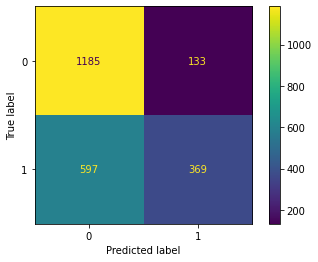

In [131]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm_decisionTree = confusion_matrix(y_test,y_predict_decisionTree, labels=clf_1_decisionTree.classes_)

# ploting with labels
disp_cm = ConfusionMatrixDisplay(confusion_matrix=cm_decisionTree, display_labels=clf_1_decisionTree.classes_)
disp_cm.plot()

# showing the matrix


confusion matrix for random forest model 

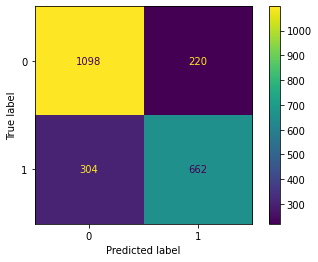

In [134]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_predict_randomForest, labels=clf_randomForest.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_randomForest.classes_)
disp.plot()

# showing the matrix
